# REMINDER FOR NEXT TIME: When generating 16000 classes takes ages. Make it faster. At least put everything in a python script. Try to eliminate some buckle...

# Use the imageloader from pytoch
Check the link: https://github.com/pytorch/vision#imagefolder

The documentation here is as well useful: https://github.com/pytorch/vision/blob/master/torchvision/datasets/folder.py#L66

The images should be arranged in the following way:

`root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png
`

`
root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
`

`
dset.ImageFolder(root="root folder path", [transform, target_transform])
`


**Members:**

`
self.classes - The class names as a list
self.class_to_idx - Corresponding class indices
self.imgs - The list of (image path, class-index) tuples
`

**Atributes:**
* *`classes`* (list): list of the class names.
* *`class_to_idx`* (dict): Dict with items (class_name, class_index).
* *`imgs`* (list): List of (image path, class_index) tuples.



## Notes on torchvision transformations:

- Compose([...])
- Scale()
- CenterCrop()
- RandomCrop()
- RandomHorizontalFlip
- RandomSizedCrop()
- Pad()
- Lambda()

In [53]:
import os
import numpy as np

from torchvision import transforms
from PIL import Image
from skimage import color
from skimage.transform import rotate as pad_rotation
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
# General variables
root_path = './surrogate_dataset'
classes_path = os.path.join(root_path, 'classes_folder_16000_set_4')
nb_classes = 16000    # this will be the number of classes

In [3]:
# Here I saved the images that are going to define the labels (in this cell):

# Get the images from the unlabeled subset
def read_images(path):
    with open(path, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images
    
unlab_set = read_images('./data/stl10_binary/unlabeled_X.bin')
np.random.seed(42)

In [8]:
# indexes drawn in a set to avoid duplicates
indexes = set()
while len(indexes) < nb_classes:
    indexes.add(np.random.randint(unlab_set.shape[0]))

In [9]:
# Save the images in a folder 
if not os.path.exists(classes_path):
    os.makedirs(classes_path)

toPill = transforms.Compose([transforms.ToPILImage()])

for num, idx in tqdm(enumerate(indexes)):
    path = os.path.join(classes_path, str(num).zfill(len(str(nb_classes))))
    #print path
    image = toPill(unlab_set[idx])
    image.save(path + '.png')

16000it [00:23, 674.42it/s]


Indexes on the unlabeled set from STL10: 1073 1313


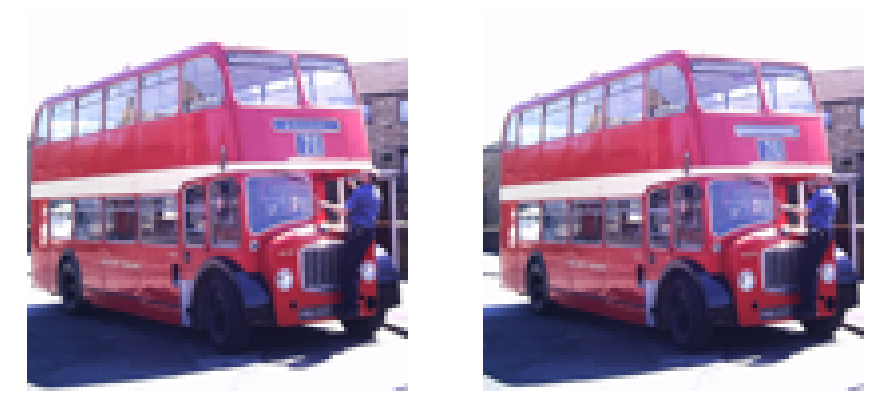

In [82]:
# code to compare the clustered images...

indexes_list = [a for a in indexes]
idx1 = indexes_list[616] # here I put the children number fro the code in the clustering folder
idx2 = indexes_list[750]
toPill = transforms.Compose([transforms.ToPILImage()])
image1 = toPill(unlab_set[idx1])
image2 = toPill(unlab_set[idx2])
print "Indexes on the unlabeled set from STL10:",
print idx1, idx2
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(image1)
plt.axis('off')
plt.subplot(122)
plt.imshow(image2)
plt.axis('off')
plt.show()